# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [3]:
# load required libraries/modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df=pd.read_csv(r"C:\Users\Ravi\Python\datasets\covid_19_data.csv")

df
# Display basic information about the dataset



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# 2. Data Cleaning:

Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [6]:
# Handle missing values
df.isna().sum()
#df.fillna(value='NA',inplace=True)

#Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [9]:
cat=[]
con=[]

for i in df:
    if df[i].dtypes=='object':
        cat.append(i)
    else: con.append(i)
        

In [10]:
print(cat)
con


['Province/State', 'Country/Region', 'Last Update']


['SNo', 'ObservationDate', 'Confirmed', 'Deaths', 'Recovered']

In [48]:
# Descriptive statistics
df['Deaths'].describe()
df['Confirmed'].describe()
df['Recovered'].describe()

# Summary statistics for categorical columns


df['Country/Region'].describe()
df['Province/State'].describe()



count     306429
unique       229
top       Russia
freq       30251
Name: Country/Region, dtype: object

# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

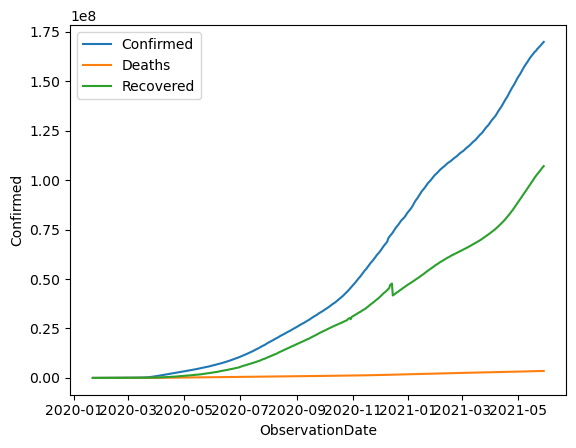

In [44]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time
# Plot time series data using line plot

# syntax: 
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')



# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

<Figure size 1000x1600 with 0 Axes>

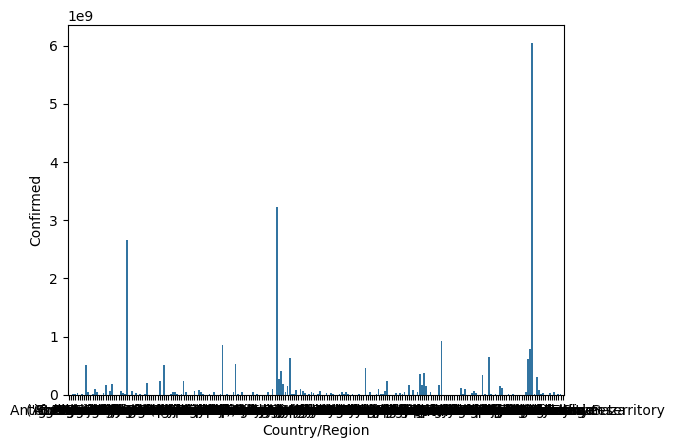

<Figure size 1000x1600 with 0 Axes>

In [17]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.figure(figsize=(10,16))


# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

<Axes: >

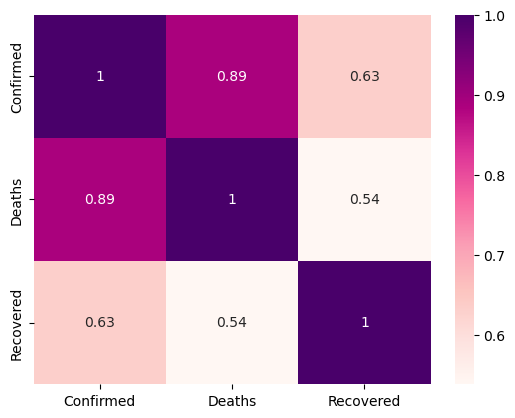

In [20]:
# Correlation analysis between confirmed,deaths and recovered

x=df[['Confirmed','Deaths','Recovered']].corr()
x
# Plot correlation on heat map
sns.heatmap(x,annot=True,cmap="RdPu")



# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [23]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.
df_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


<Axes: xlabel='Country/Region'>

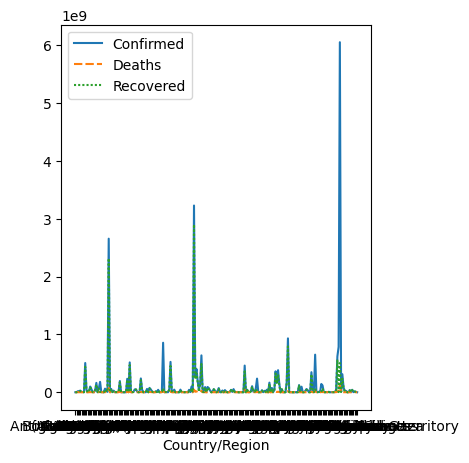

In [24]:
plt.figure(figsize=(4,5))
sns.lineplot(df_country)

In [25]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
dt10=df_country.sort_values(by=['Deaths','Recovered','Confirmed'],ascending=False).head(10)
dt10

,Confirmed,Deaths,Recovered
Country/Region,,,
US,6.049146e+09,123303762.0,5.033710e+08
Brazil,2.653588e+09,72624610.0,2.313677e+09
India,3.226768e+09,44424723.0,2.900590e+09
Mexico,4.604637e+08,43005509.0,3.617802e+08
UK,7.837944e+08,29171984.0,2.327572e+06
Italy,6.366943e+08,26000702.0,4.877998e+08
France,8.551890e+08,22720818.0,6.940743e+07
Spain,6.491118e+08,19065104.0,6.119362e+07
Russia,9.305488e+08,18363719.0,7.907057e+08


In [26]:
# Visualize the distribution of deaths using bar chart


In [ ]:
df['Deaths'].value_counts().plot(kind='hist')

<function matplotlib.pyplot.show(close=None, block=None)>

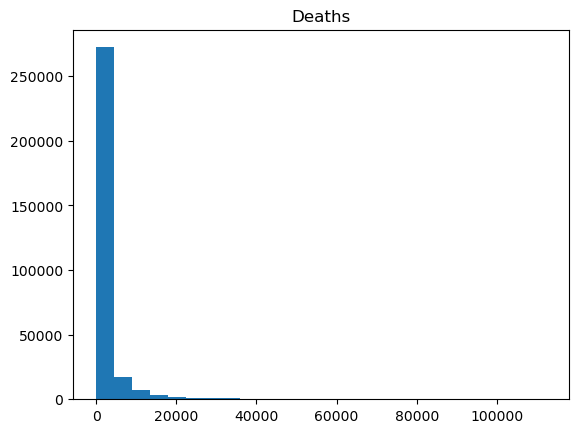

In [60]:
plt.title('Deaths')
plt.hist(df['Deaths'], bins=25)
plt.show
